In [1]:
import pandas as pd

The line "import pandas as pd" is a common code snippet in Python that imports the pandas library and assigns it the alias "pd." The pandas library is a powerful data manipulation and analysis library that provides data structures and functions to efficiently work with structured data, such as tabular data (similar to data in spreadsheets).

In [2]:
import zipfile

# Replace 'your_file.zip' with the actual name of the zip file you uploaded
with zipfile.ZipFile("/content/archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall('my_extracted_folder')


using the zipfile module in Python to extract the contents of a zip file.

In [3]:
import pandas as pd

# Replace 'your_csv_file.csv' with the actual name of the CSV file within the extracted folder
csv_file_path = '/content/my_extracted_folder/alldata_1_for_kaggle.csv'

df = pd.read_csv(csv_file_path, encoding='latin-1')


In [4]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [5]:
# column fixing
df.drop(columns = {'Unnamed: 0'},inplace = True)
df.rename(columns = {'0':'disease','a':'symptoms'},inplace = True)
df

,disease,symptoms
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [6]:
pd.set_option('display.max_colwidth',100)
df

,disease,symptoms
0,Thyroid_Cancer,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib ...
1,Thyroid_Cancer,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusiv..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperativ...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by a...
4,Thyroid_Cancer,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who presented with chief complaintsof shortness of breath ...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs reported previously the incidence of quadruple advanc...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally accepted and astem celllike subpopulation that is...
7568,Colon_Cancer,"""adipogenesis is the process through which mesenchymalstem cells mscs commit to the adipose line..."


 Using the pandas library to modify the display options for a DataFrame and then displaying the DataFrame.

In [7]:
# classes we have
df['disease'].value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: disease, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

Using the LabelEncoder class from the sklearn.preprocessing module, which is part of the scikit-learn library. This line of code imports the LabelEncoder class from scikit-learn's preprocessing module. The LabelEncoder is used for label encoding, which is a technique to convert categorical labels (strings or integers) into numerical values.

In [9]:
# converting the class column text to to number using LabelEncoder
df['disease'] = label.fit_transform(df['disease'])
df

,disease,symptoms
0,2,Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib ...
1,2,""" The adopted strategy was the same as that used in prior years [] and is based on four exclusiv..."
2,2,coronary arterybypass grafting thrombosis ï¬brin ï¬brinogen mutationIntroduction Intraoperativ...
3,2,Solitary plasmacytoma SP of the skull is an uncommon clinical entity that is characterized by a...
4,2,This study aimed to investigate serum matrix metalloproteinase MMP2 and MMP9levels in patients ...
...,...,...
7565,0,we report the case of a 24yearold man who presented with chief complaintsof shortness of breath ...
7566,0,among synchronous colorectal cancers scrcs reported previously the incidence of quadruple advanc...
7567,0,the heterogeneity of cancer cells is generally accepted and astem celllike subpopulation that is...
7568,0,"""adipogenesis is the process through which mesenchymalstem cells mscs commit to the adipose line..."


In [10]:
df['disease'].value_counts()

2    2810
0    2580
1    2180
Name: disease, dtype: int64

Dataset Spliting Into Train And Test

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['symptoms'],df['disease'])

The code is performing a common practice in machine learning called data splitting for training and testing purposes. By using the train_test_split function, you are dividing your dataset into two sets: one for training your machine learning model (X_train and y_train) and another for testing its performance (X_test and y_test).

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5677,)
(1893,)
(5677,)
(1893,)


Model Buidling Using sklearn Pipeline Class

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

The code is building a pipeline for text classification using the Multinomial Naive Bayes algorithm. The pipeline consists of two steps: text feature extraction using CountVectorizer and classification using the MultinomialNB classifier. This is a common approach for processing text data and building a text classification model.

In [14]:
# model building
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [15]:
# training the model

clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

The code is training a machine learning model for text classification using the pipeline you defined earlier. By calling clf.fit(X_train, y_train), you're fitting the pipeline to your training data. This process involves both feature extraction using CountVectorizer and training the MultinomialNB classifier.

In [16]:
clf.score(X_test,y_test)

0.9249867934495509

After running this code, you'll obtain a value between 0 and 1, representing the accuracy of the model on the testing data. For instance, if the accuracy is 0.85, it means that the model's predictions matched the actual labels for 85% of the testing instances.

In [17]:
y_predicted = clf.predict(X_test)

Generating Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[627,   0,  49],
       [  0, 531,   0],
       [ 93,   0, 593]])

The code is calculating a confusion matrix to assess the performance of the machine learning model on the testing data. The confusion matrix provides valuable insights into how well the model is predicting each class and helps identify different types of prediction errors. It's particularly useful for understanding the behavior of the model in a multi-class classification scenario.

Visualizing The Confusion Matrix

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

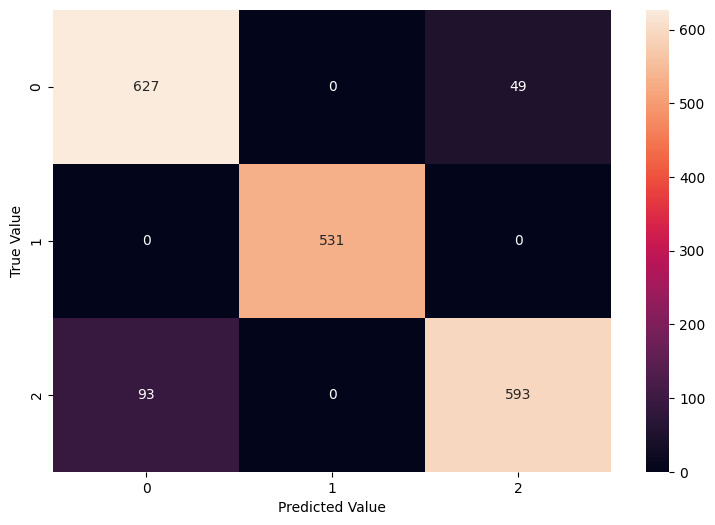

In [21]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

The code is creating and displaying a heatmap visualization of the confusion matrix using matplotlib and seaborn. The heatmap provides a visual representation of the distribution of predicted and actual class labels in the confusion matrix.

The x-axis of the heatmap represents the predicted class labels, while the y-axis represents the actual (true) class labels. Each cell in the heatmap corresponds to the count of instances that fall into a particular combination of predicted and actual class labels. The color intensity in each cell indicates the count, with darker colors representing higher counts.

This visualization is useful for quickly identifying patterns and areas of confusion in your model's predictions. It allows you to see which class labels are commonly misclassified and which are accurately predicted.

Generating Classification Report

In [22]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       676
           1       1.00      1.00      1.00       531
           2       0.92      0.86      0.89       686

    accuracy                           0.92      1893
   macro avg       0.93      0.93      0.93      1893
weighted avg       0.93      0.92      0.92      1893



Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. A high precision indicates that when the model predicts a positive label, it is likely to be correct.

Recall (Sensitivity): Recall measures the proportion of true positive predictions among all actual positive instances. A high recall indicates that the model is good at identifying positive instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It balances precision and recall, providing a single metric that considers both false positives and false negatives. It is especially useful when class distribution is imbalanced.

Support: The number of actual instances for each class in the testing dataset. It gives context to the performance metrics.

Accuracy: Accuracy is the proportion of correct predictions (both true positives and true negatives) to the total number of instances. While it's a common metric, it might not be suitable for imbalanced datasets.

Macro Avg: The average of precision, recall, and F1-score across all classes. Each class is treated equally regardless of its frequency in the dataset.

Weighted Avg: The average of precision, recall, and F1-score, weighted by the number of instances in each class. It gives more weight to classes with more instances.

In [23]:
def predict(text):
    prediction = clf.predict([text])
    if prediction == 0:
        return 'Colon Cancer'
    elif prediction == 1:
        return 'Thyroid Cancer'
    elif prediction == 2:
        return 'Lung Cancer'

In [24]:
input_text = "Thyroid surgery in children in a single institution from Osama Ibrahim Almosallama Ali Aseerib"
prediction = predict(input_text)
print(prediction)

Lung Cancer
